<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# 1. Load Dataset

In [0]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal Width')

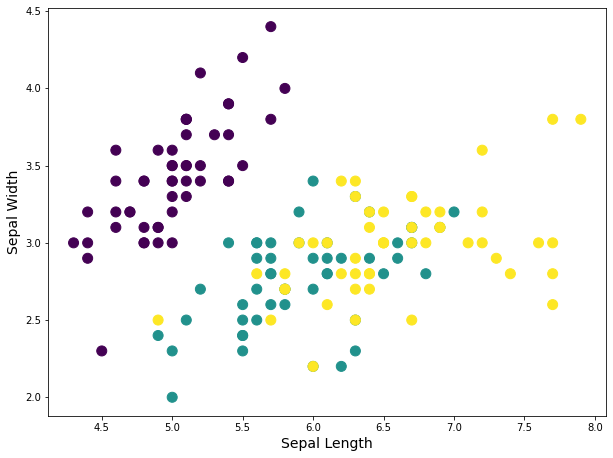

In [0]:
fig  = plt.figure(figsize=(10, 7.5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

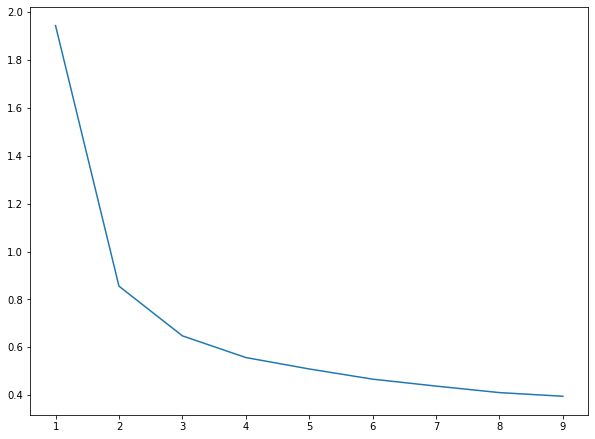

In [0]:
mean_dist = []
max_k = 10
for k in range(1, max_k):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  mean_dist.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

fig  = plt.figure(figsize=(10, 7.5))
plt.plot(range(1, max_k), mean_dist)

Text(0.5, 1.0, 'Predicted')

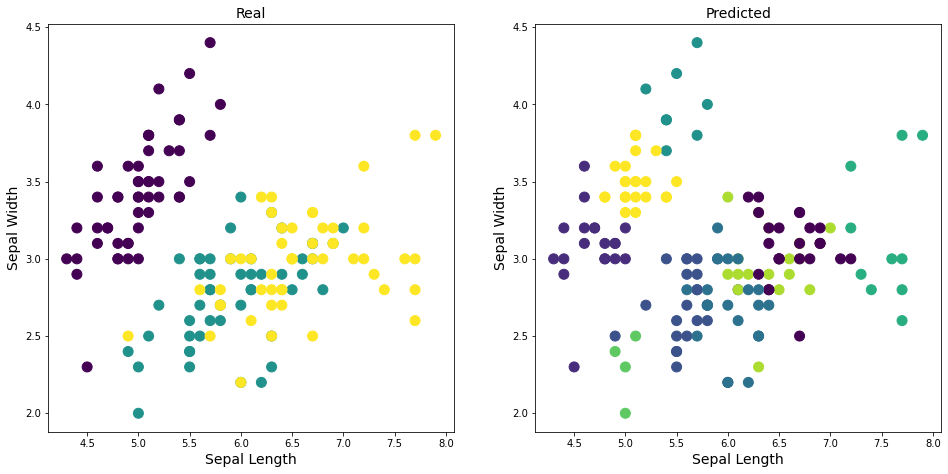

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(16,7.5))

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=100)
ax[0].set_xlabel('Sepal Length', fontsize=14)
ax[0].set_ylabel('Sepal Width', fontsize=14)
ax[0].set_title('Real', fontsize=14)

ax[1].scatter(X[:, 0], X[:, 1], c=km.labels_, s=100)
ax[1].set_xlabel('Sepal Length', fontsize=14)
ax[1].set_ylabel('Sepal Width', fontsize=14)
ax[1].set_title('Predicted', fontsize=14)

# 2. Hierachical Clustering

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

L = linkage(X, 'ward')

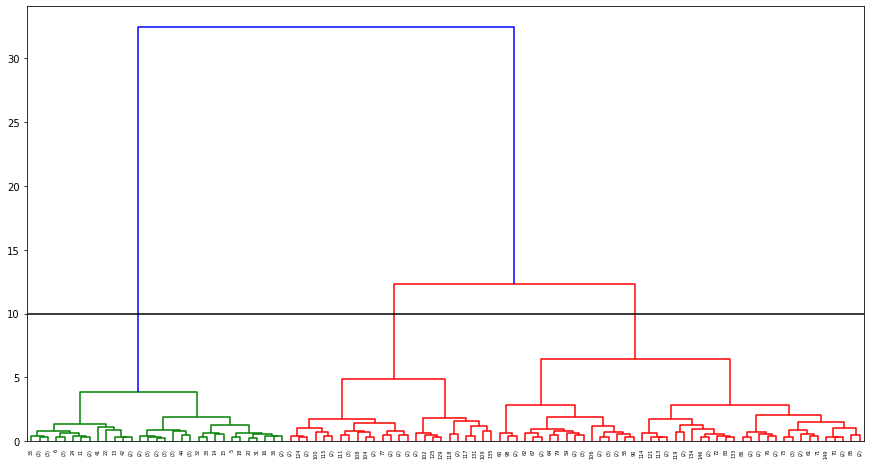

In [0]:
fig  = plt.figure(figsize=(15, 8))

dendrogram(L, truncate_mode='lastp', p=100)
plt.axhline(y=10, c='k')
plt.show()